In [27]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [29]:
df = pd.read_csv('./data/bergfreunde-pagination_20210312.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      3600 non-null   object 
 1   web-scraper-start-url  3600 non-null   object 
 2   pagination             2296 non-null   float64
 3   pagination-href        2296 non-null   object 
 4   shoe                   3600 non-null   object 
 5   shoe-href              3600 non-null   object 
 6   brand                  3600 non-null   object 
 7   model                  3600 non-null   object 
 8   use_case               3600 non-null   object 
 9   material               3598 non-null   object 
 10  closure                3261 non-null   object 
 11  sole                   3555 non-null   object 
 12  asymmetry              3485 non-null   object 
 13  downturn               2301 non-null   object 
 14  vorspann               3143 non-null   object 
 15  terr

In [30]:
df = df.drop(['web-scraper-order', 'web-scraper-start-url', 'pagination',
       'pagination-href','shoe-href', 'shoe', 'rating-href' ], axis=1)

In [31]:
df['model_clean'] = df['model'].apply(lambda row: row[:-16])
df['brand_clean'] = df['brand'].apply(lambda row: row[:-2])
df['shoe'] = df['brand_clean'] + ' - ' + df['model_clean']
df['shoe_id'] = df.groupby('shoe').ngroup()
df_shoes = df.drop_duplicates(subset=['shoe'], ignore_index=True)
df_shoes = df_shoes[['shoe_id', 'shoe', 'brand', 'model', 'use_case', 'material', 'closure', 'sole',
       'asymmetry', 'downturn', 'vorspann', 'terrain', 'foot_family',
       'best_fit', 'overall_rating', 'rate_num', 'rating', 'name', 'date',
       'review_title', 'review_text', 'model_clean', 'brand_clean']]
df_shoes = df_shoes.drop(['brand', 'model', 'overall_rating', 'rate_num', 'rating', 'name', 'date',
       'review_title', 'review_text','model_clean', 'brand_clean'], axis=1)
df['user_id'] = df.groupby('name').ngroup()
ratings = df.dropna(subset=['rating'])
ratings = ratings.drop(['brand', 'model', 'use_case', 'material', 'closure', 'sole',
       'asymmetry', 'downturn', 'vorspann', 'terrain', 'foot_family','best_fit', 'rate_num','name','model_clean', 'brand_clean', 'shoe', 'overall_rating'],axis=1 )
ratings = ratings[['user_id', 'shoe_id', 'rating', 'date', 'review_title', 'review_text']]
ratings['rating'] = ratings['rating'].apply(lambda r: int(r[:1]))

In [32]:
df_shoes.head(3)

,shoe_id,shoe,use_case,material,closure,sole,asymmetry,downturn,vorspann,terrain,foot_family,best_fit
0,93,La Sportiva - Skwama,"Sportklettern, Bouldern","Leder/Synthetik, Mikrofaser",Klettverschluss,Vibram XS Grip 2,stark asymmetrisch,leicht/mittel,hoch,"Vertikale, Überhang",NaN,Normaler Fuß / mittleres Volumen
1,189,Scarpa - Booster,"Sportklettern, Bouldern",Mikrofaser,Klettverschluss,Vibram XS Grip 2,stark asymmetrisch,aggressiv,hoch,"Vertikale, Überhang",Ägyptisch,Schmaler Fuß / geringes Volumen
2,160,Ocun - Ozone,"Bouldern, Sportklettern","Mikrofaser, Kunstleder",Klettverschluss,Vibram XS Grip,leicht asymmetrisch,NaN,hoch,"Vertikale, Überhang",NaN,NaN


In [33]:
ratings.head(3)

,user_id,shoe_id,rating,date,review_title,review_text
0,219,93,5,NaN,NaN,NaN
1,803,189,5,27.11.2020,Top Schuh,"Bin begeistert, trotz hoher Vorspannung und As..."
2,1098,160,5,02.12.2018,Super Allround Schuh,Habe schon das 4. Paar im Einsatz. Mir paßt di...


In [34]:
n_ratings = len(ratings)
n_shoes = ratings['shoe_id'].nunique()
n_users = ratings['user_id'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique shoe_id's: {n_shoes}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per shoe: {round(n_ratings/n_shoes, 2)}")

Number of ratings: 3486
Number of unique shoe_id's: 142
Number of unique users: 1136
Average number of ratings per user: 3.07
Average number of ratings per shoe: 24.55


In [9]:
user_freq = ratings[['user_id', 'shoe_id']].groupby('user_id').count().reset_index()
user_freq.columns = ['user_id', 'n_ratings']
user_freq.head()

,user_id,n_ratings
0,0,1
1,1,3
2,2,2
3,3,1
4,4,5


In [10]:
print(f"Mean number of ratings for a given user: {user_freq['n_ratings'].mean():.2f}.")

Mean number of ratings for a given user: 3.07.


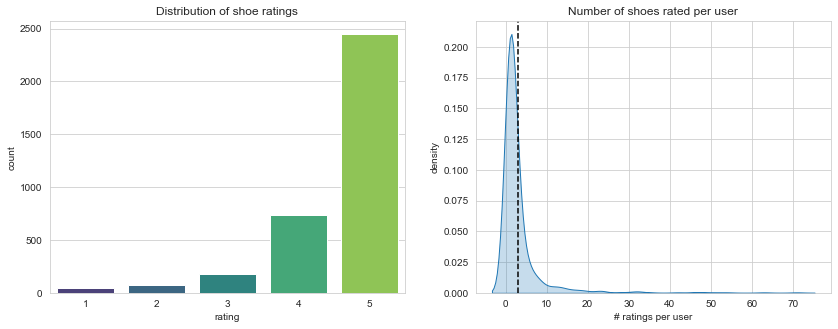

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of shoe ratings")

plt.subplot(1,2,2)
ax = sns.kdeplot(user_freq['n_ratings'], shade=True, legend=False)
plt.axvline(user_freq['n_ratings'].mean(), color="k", linestyle="--")
plt.xlabel("# ratings per user")
plt.ylabel("density")
plt.title("Number of shoes rated per user")
plt.show()

In [12]:
mean_rating = ratings.groupby('user_id')[['rating']].mean()

lowest_rated = mean_rating['rating'].idxmin()
df_shoes.loc[df_shoes['shoe_id'] == lowest_rated]

,shoe_id,shoe,use_case,material,closure,sole,asymmetry,downturn,vorspann,terrain,foot_family,best_fit
245,50,Five Ten - Asym VCS,"Indoorklettern, Sportklettern","Leder, Textil, Synthetik",Klettverschluss,Stealth,leicht asymmetrisch,keiner,leicht/mittel,"Vertikale, Platte",NaN,NaN


In [13]:
highest_rated = mean_rating['rating'].idxmax()
df_shoes.loc[df_shoes['shoe_id'] == highest_rated]

,shoe_id,shoe,use_case,material,closure,sole,asymmetry,downturn,vorspann,terrain,foot_family,best_fit
112,0,BUTORA - Acro Orange,"Bouldern, Sportklettern",Leder,Klettverschluss,Neo Fuse,stark asymmetrisch,leicht/mittel,hoch,"Vertikale, Überhang",NaN,Breiter Fuß / viel Volumen


In [14]:
ratings[ratings['shoe_id']==highest_rated]

,user_id,shoe_id,rating,date,review_title,review_text
455,221,0,5,04.05.2020,Den Schuh würde ich nochmal kaufen,"Guter Sitz. Am Anfang sehr eng,legt sich aber ..."
869,939,0,5,16.09.2019,Sehr bequem und trotzdem extrem gute Performance!,Sehr bequem und trotzdem extrem gute Performance!
953,889,0,5,11.03.2019,Bisher bester Schuh,Im Vergleich zu vorher anderen benutzen Schuhe...
2145,573,0,5,13.06.2019,tolle Boulderschuhe,Für mich kommt der Schuh ziemlich nahe an den ...


Bayesian Average
Bayesian Average is defined as:

$r_{i} = \frac{C \times m + \Sigma{\text{reviews}}}{C+N}$

where $C$ represents our confidence, $m$ represents our prior, and $N$ is the total number of reviews for movie $i$. In this case, our prior will be the average rating across all shoes. By defintion, C represents "the typical dataset size". Let's make $C$ be the average number of ratings for a given shoe.

In [15]:
shoe_stats = ratings.groupby('shoe_id')[['rating']].agg(['count', 'mean'])
shoe_stats.columns = shoe_stats.columns.droplevel()
shoe_stats.head()

,count,mean
shoe_id,,
0,4,5.000000
3,3,4.666667
5,4,4.750000
6,3,4.333333
8,18,4.444444


In [16]:
C = shoe_stats['count'].mean()
m = shoe_stats['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return bayesian_avg

bayesian_avg_ratings = ratings.groupby('shoe_id')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['shoe_id', 'bayesian_avg']
shoe_stats = shoe_stats.merge(bayesian_avg_ratings, on='shoe_id')
shoe_stats.head()

,shoe_id,count,mean,bayesian_avg
0,0,4,5.000000,4.475999
1,3,3,4.666667,4.420679
2,5,4,4.750000,4.440971
3,6,3,4.333333,4.384381
4,8,18,4.444444,4.413389


In [17]:
shoe_stats = shoe_stats.merge(df_shoes[['shoe_id', 'shoe']])
shoe_stats.sort_values('bayesian_avg', ascending=False).head()

,shoe_id,count,mean,bayesian_avg,shoe
61,109,88,4.886364,4.778232,La Sportiva - Women's Mythos
42,89,154,4.837662,4.776197,La Sportiva - Mythos
35,82,104,4.730769,4.665810,La Sportiva - Katana Laces
40,87,118,4.720339,4.663556,La Sportiva - Miura VS
47,94,224,4.687500,4.658177,La Sportiva - Solution


In [18]:
shoe_stats.sort_values('bayesian_avg', ascending=True).head()

,shoe_id,count,mean,bayesian_avg,shoe
24,55,11,2.909091,3.932191,Five Ten - Hiangle
23,49,4,1.250000,3.950592,Five Ten - Anasazi VCS
31,78,6,3.000000,4.117496,La Sportiva - GeckoGym
20,46,6,3.166667,4.150230,Five Ten - Aleon
91,164,5,3.000000,4.155314,Ocun - Rebel QC


In [19]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        shoe_mapper: dict that maps movie id's to movie indices
        shoe_inv_mapper: dict that maps movie indices to movie id's
    """
    N = df['user_id'].nunique()
    M = df['shoe_id'].nunique()

    user_mapper = dict(zip(np.unique(df["user_id"]), list(range(N))))
    shoe_mapper = dict(zip(np.unique(df["shoe_id"]), list(range(M))))
    
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["user_id"])))
    shoe_inv_mapper = dict(zip(list(range(M)), np.unique(df["shoe_id"])))
    
    user_index = [user_mapper[i] for i in df['user_id']]
    shoe_index = [shoe_mapper[i] for i in df['shoe_id']]

    X = csr_matrix((df["rating"], (shoe_index, user_index)), shape=(M, N))
    
    return X, user_mapper, shoe_mapper, user_inv_mapper, shoe_inv_mapper

In [20]:
X, user_mapper, shoe_mapper, user_inv_mapper, shoe_inv_mapper = create_X(ratings)

Let's check out the sparsity of our X matrix.

Here, we calculate sparsity by dividing the number of non-zero elements by total number of elements as described in the equation below:

$$S=\frac{\text{# non-zero elements}}{\text{total elements}}$$

In [21]:
sparsity = X.count_nonzero()/(X.shape[0]*X.shape[1])

print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 1.89%


In [22]:
from scipy.sparse import save_npz

save_npz('./data/user_item_matrix.npz', X)

In [23]:
from sklearn.neighbors import NearestNeighbors

def find_similar_shoes(shoe_id, X, k, metric='cosine', show_distance=False):
    """
    Finds k-nearest neighbours for a given shoe_id.
    
    Args:
        shoe_id: id of the shoe of interest
        X: user-item utility matrix
        k: number of similar shoes to retrieve
        metric: distance metric for kNN calculations
    
    Returns:
        list of k similar shoe ID's
    """
    neighbour_ids = []
    
    shoe_ind = shoe_mapper[shoe_id]
    shoe_vec = X[shoe_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    if isinstance(shoe_vec, (np.ndarray)):
        shoe_vec = shoe_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(shoe_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(shoe_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [24]:
shoe_models = dict(zip(df_shoes['shoe_id'], df_shoes['shoe']))

shoe_id = 200

similar_ids = find_similar_shoes(shoe_id, X, k=10)
shoe_model = shoe_models[shoe_id]

print(f"Because you bought: {shoe_model}...\n")
for i in similar_ids:
    print(shoe_models[i])

Because you bought: Scarpa - Instinct VS...

La Sportiva - Futura
La Sportiva - Solution
La Sportiva - Skwama
Ocun - Pearl  LU
La Sportiva - Speedster
La Sportiva - Miura VS
La Sportiva - Katana
La Sportiva - Cobra
La Sportiva - Genius
Ocun - Kid's Hero QC
